In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Readt Data
data = pd.read_csv("dataset.csv")
print(data.head())
data.info()
data.describe()
data.isnull().sum()
data.nunique()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#Rename features
dic = {'age' : 'Age',
       'sex' : 'Sex',
       'exang' : 'ExerciceAngina',
       'ca' : 'MajorVessel',
       'cp' : 'ChestPain',
       'trestbps' : 'RestingBloodPressure',
       'chol' : 'Cholesteral',
       'fbs' : 'FastingBloodSugar',
       'oldpeak' : 'OldPeak',
       'restecg' : 'RestingECG',
       'slope' : 'Slope',
       'thalach' : 'MaxHeartRate',
       'thal' : 'DefectType',
       'target' : 'Output'}

old_names = list(data.columns)
print(old_names)
#print(data.columns)
#print(data)
new_names = []
for i in old_names:
    new_names.append(dic[i])   
data.columns = new_names
print(new_names)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholesteral', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExerciceAngina', 'OldPeak', 'Slope', 'MajorVessel', 'DefectType', 'Output']


Text(0.5, 0, 'Output : 0 Less chance of heart attack; 1 more chance of heart attack')

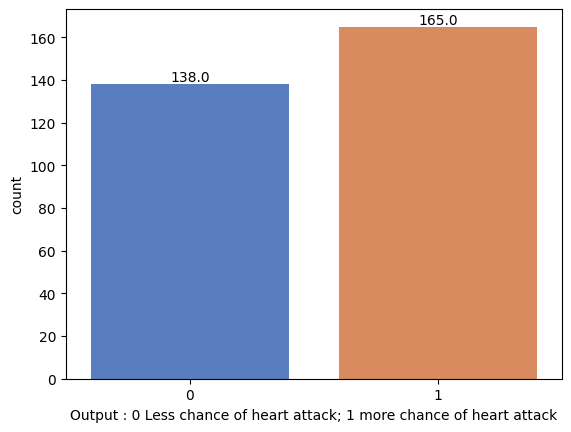

In [7]:
# Count total target
ax=sns.countplot(x='Output', data=data, hue='Output', palette='muted', legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Output : 0 Less chance of heart attack; 1 more chance of heart attack')
#plt.figure(figsize=(6,4))
#data['Output'].value_counts(normalize=True).plot.bar(title= 'Output')

In this dataset we have :
- 138 individuals with less chance of heart attack
- 165 individuals with more chance of heart attack

Text(0.5, 0, 'Output : 0 Less chance of heart attack; 1 more chance of heart attack ')

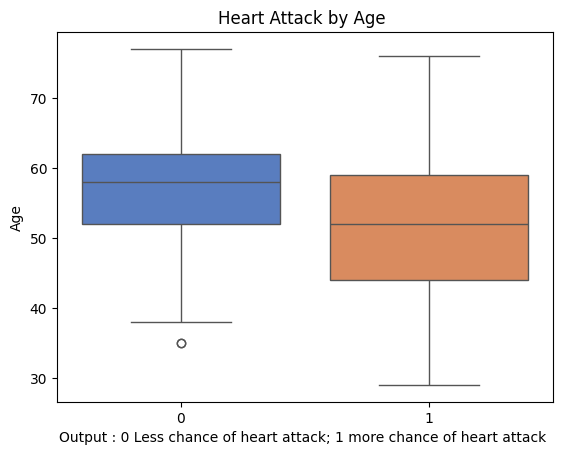

In [8]:
bp = sns.boxplot(x='Output', y='Age', data=data, hue='Output', palette='muted', legend=False)
plt.title('Heart Attack by Age ')
plt.xlabel('Output : 0 Less chance of heart attack; 1 more chance of heart attack ')


- The median age with less chance of heart attack is higher.
- The spread for less chance of heart attack is smaller.


Text(0.5, 1.0, 'Distribution of ages within each sex')

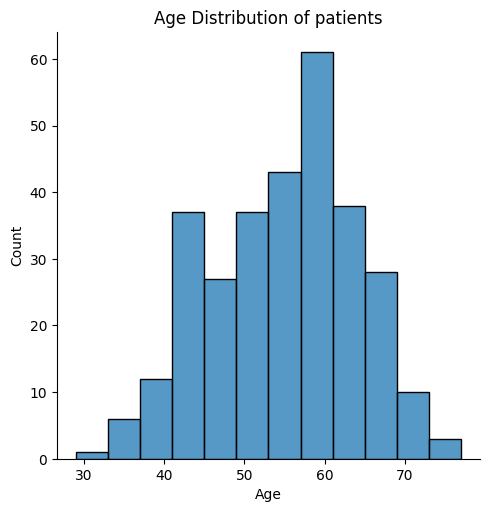

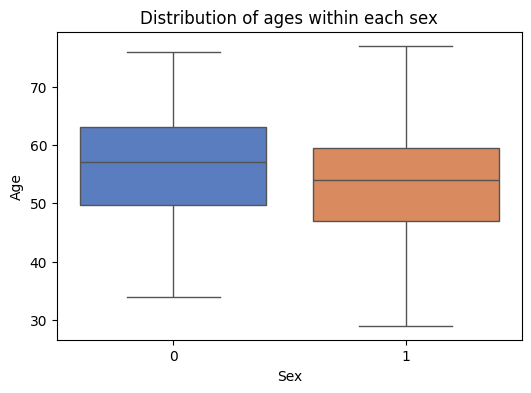

In [9]:
#Age distribution
sns.displot(data['Age'], kind='hist', height=5)
plt.title('Age Distribution of patients')
plt.xlabel('Age')
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sex', y='Age', data=data, hue='Sex', palette='muted', legend=False)
plt.title('Distribution of ages within each sex')

[41, 2, 4, 49, 152, 2, 3, 91, 2, 40, 3, 5, 4, 2]


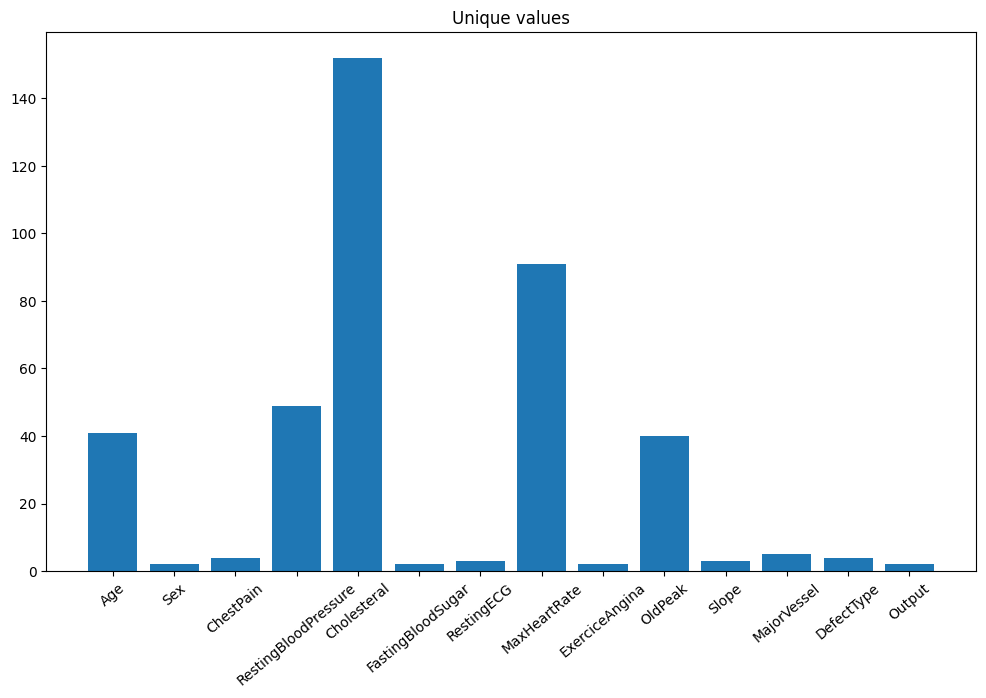

In [10]:
# Unique values in the data
y_value = []
for column in data.columns:
    y_value.append(len(data[column].unique()))
print(y_value)
plt.figure(figsize=(12,7))
plt.bar(data.columns, y_value)
plt.xticks(rotation=40)
plt.title('Unique values')
plt.show()

We have some important features (Age, ChestPain, RestingBloodPressure, Cholesterol, RestingECG and oldPeak). 
We need to spilt data


In [11]:
# Split numerical and categorical values
numerical_values = ('Age RestingBloodPressure Cholesteral MaxHeartRate OldPeak').split()
categorical_values = ('Sex ChestPain FastingBloodSugar RestingECG ExerciceAngina Slope MajorVessel DefectType').split()
target = 'Output'

In [12]:
description = pd.DataFrame(columns=['ColName', 'Mean', 'Median', 'Mode','Min', 'Max'])
for i in numerical_values:
    description.loc[len(description)] = [i, data[i].mean(), data[i].median(), data[i].mode(), data[i].min(), data[i].max()]

print(description)


                ColName        Mean  Median  \
0                   Age   54.366337    55.0   
1  RestingBloodPressure  131.623762   130.0   
2           Cholesteral  246.264026   240.0   
3          MaxHeartRate  149.646865   153.0   
4               OldPeak    1.039604     0.8   

                                                Mode    Min    Max  
0                    0    58
Name: Age, dtype: int64   29.0   77.0  
1  0    120
Name: RestingBloodPressure, dtype: int64   94.0  200.0  
2  0    197
1    204
2    234
Name: Cholesteral, ...  126.0  564.0  
3          0    162
Name: MaxHeartRate, dtype: int64   71.0  202.0  
4             0    0.0
Name: OldPeak, dtype: float64    0.0    6.2  


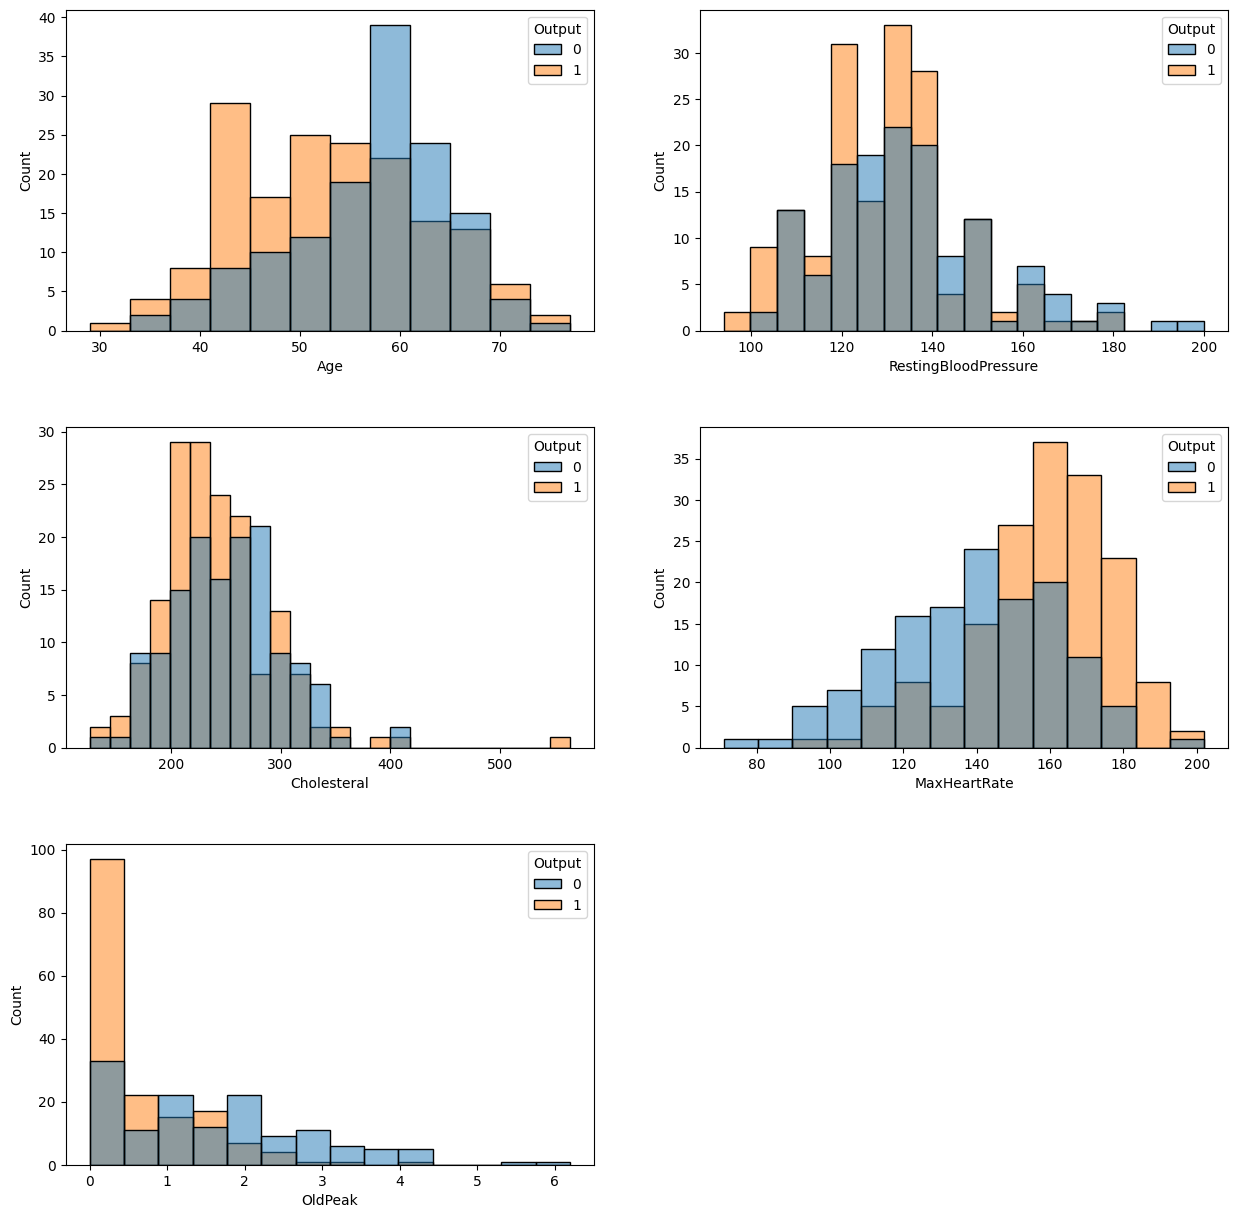

In [13]:
# Numerical values histogramm
plt.figure(figsize=(15,15))
counter = 1
for i in numerical_values:
    plt.subplot(3,2, counter)
    sns.histplot(data=data, x=i, hue='Output')
    counter+=1
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

In [14]:
print("\033[1m"+"Feature\t\t\tSkew"+"\033[0m",'')
print(data[numerical_values].skew())


Feature			Skew 
Age                    -0.202463
RestingBloodPressure    0.713768
Cholesteral             1.143401
MaxHeartRate           -0.537410
OldPeak                 1.269720
dtype: float64


Summary of numerical value :
1. Age : the ages of the patients skews to younger side. 
2. Resting Blood Pressure : the distribution leans toward higher values (skew = 0.713).
3. Chelestoral : It has a positive skewness = 1.143 wich means the majority of patients have higher cholesterol values
4. Maximum Heart Rate : It leans towars lower values 
5. Old Peak : the distribuation leans to higher values with skewness = 1.269

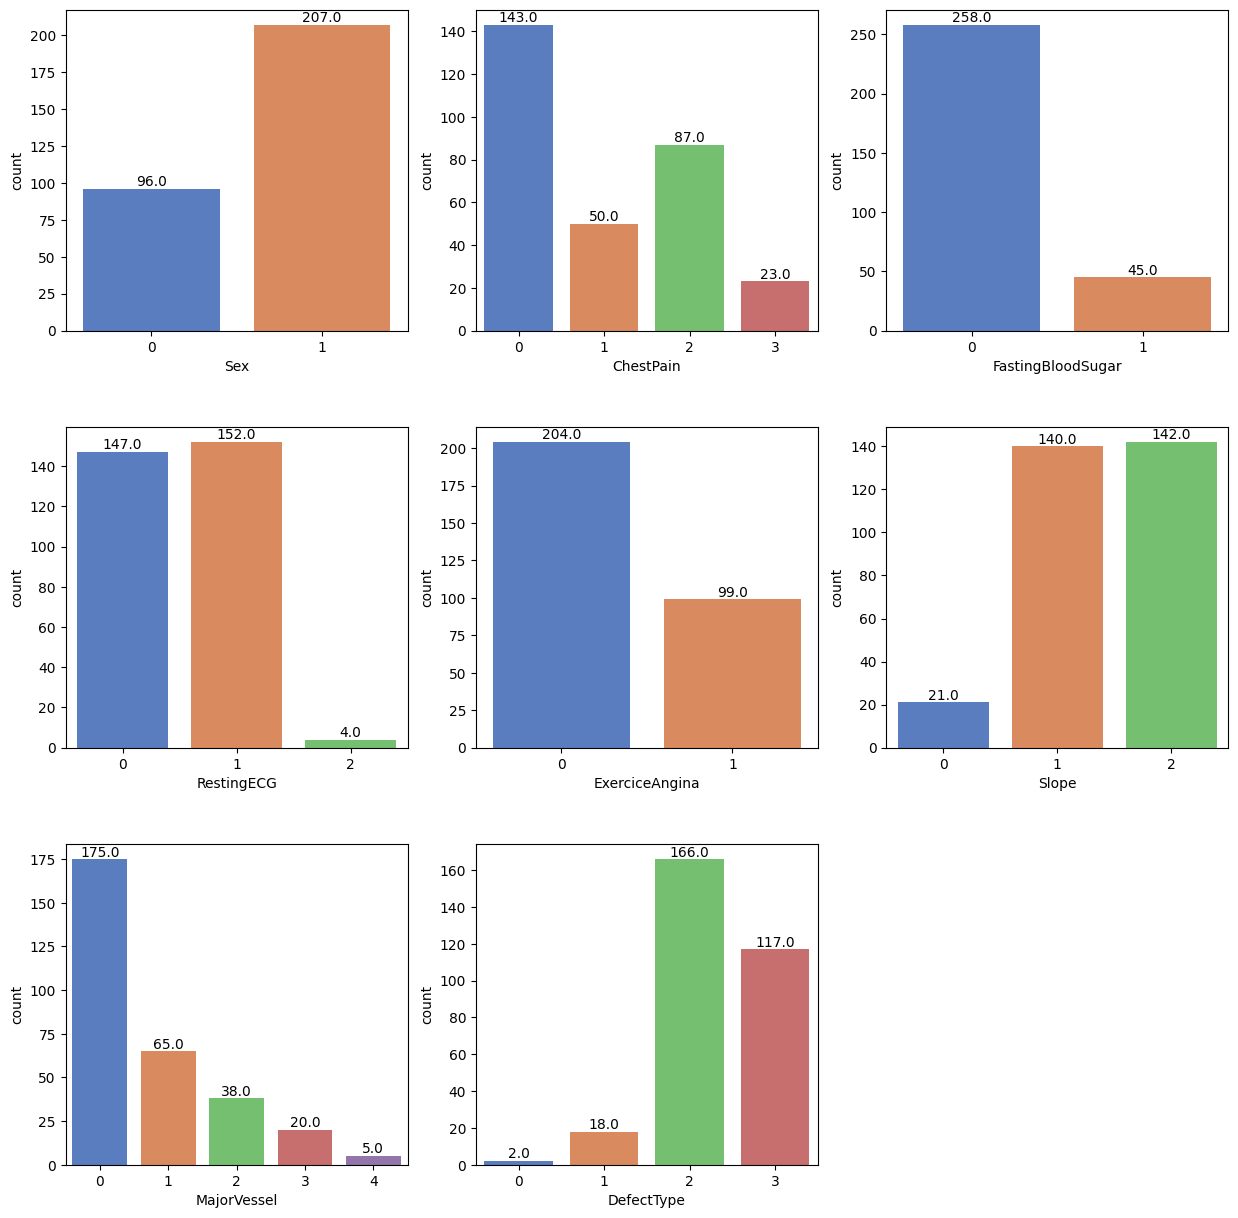

In [15]:
# Categorical values Count plot
plt.figure(figsize=(15,15))
counter = 1
for i in categorical_values:
    plt.subplot(3, 3, counter)
    ax=sns.countplot(x=data[i], hue=data[i], data=data,palette='muted', legend=False)
    counter+=1
    for p in ax.patches:
       ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

In [16]:
print("\033[1m"+"Feature\t\t\tSkew"+"\033[0m",'')
print(data[categorical_values].skew())

Feature			Skew 
Sex                 -0.791335
ChestPain            0.484732
FastingBloodSugar    1.986652
RestingECG           0.162522
ExerciceAngina       0.742532
Slope               -0.508316
MajorVessel          1.310422
DefectType          -0.476722
dtype: float64


1. Sex : the data represent 96 women and 107 men : gender imbalance.
2. ChestPain : Typical angina (Type 0) is the most frequent followed by type 2 (non-anginal pain) and then atypical angina (Type 1)
3. FastingBloodSugar : there are 45 individuals thatt have fasting blood sugar > 120 mg/dl. the majority have normal value 
4. RestingECG : Having ST-T wave abnomality (Type1)  is most common followed by nomal value (Tpye 0).
5. ExerciceAngina : 99 of individuals have chest pain after exercise camparing to 204 of individuals that do not have the pain.
6. Slope : Type 1 and 2 are the most frequent
7. MajorVessel : Type 0 is the most common
8. DefectType : the defect type 2 has the highet frequency followed by type 3.

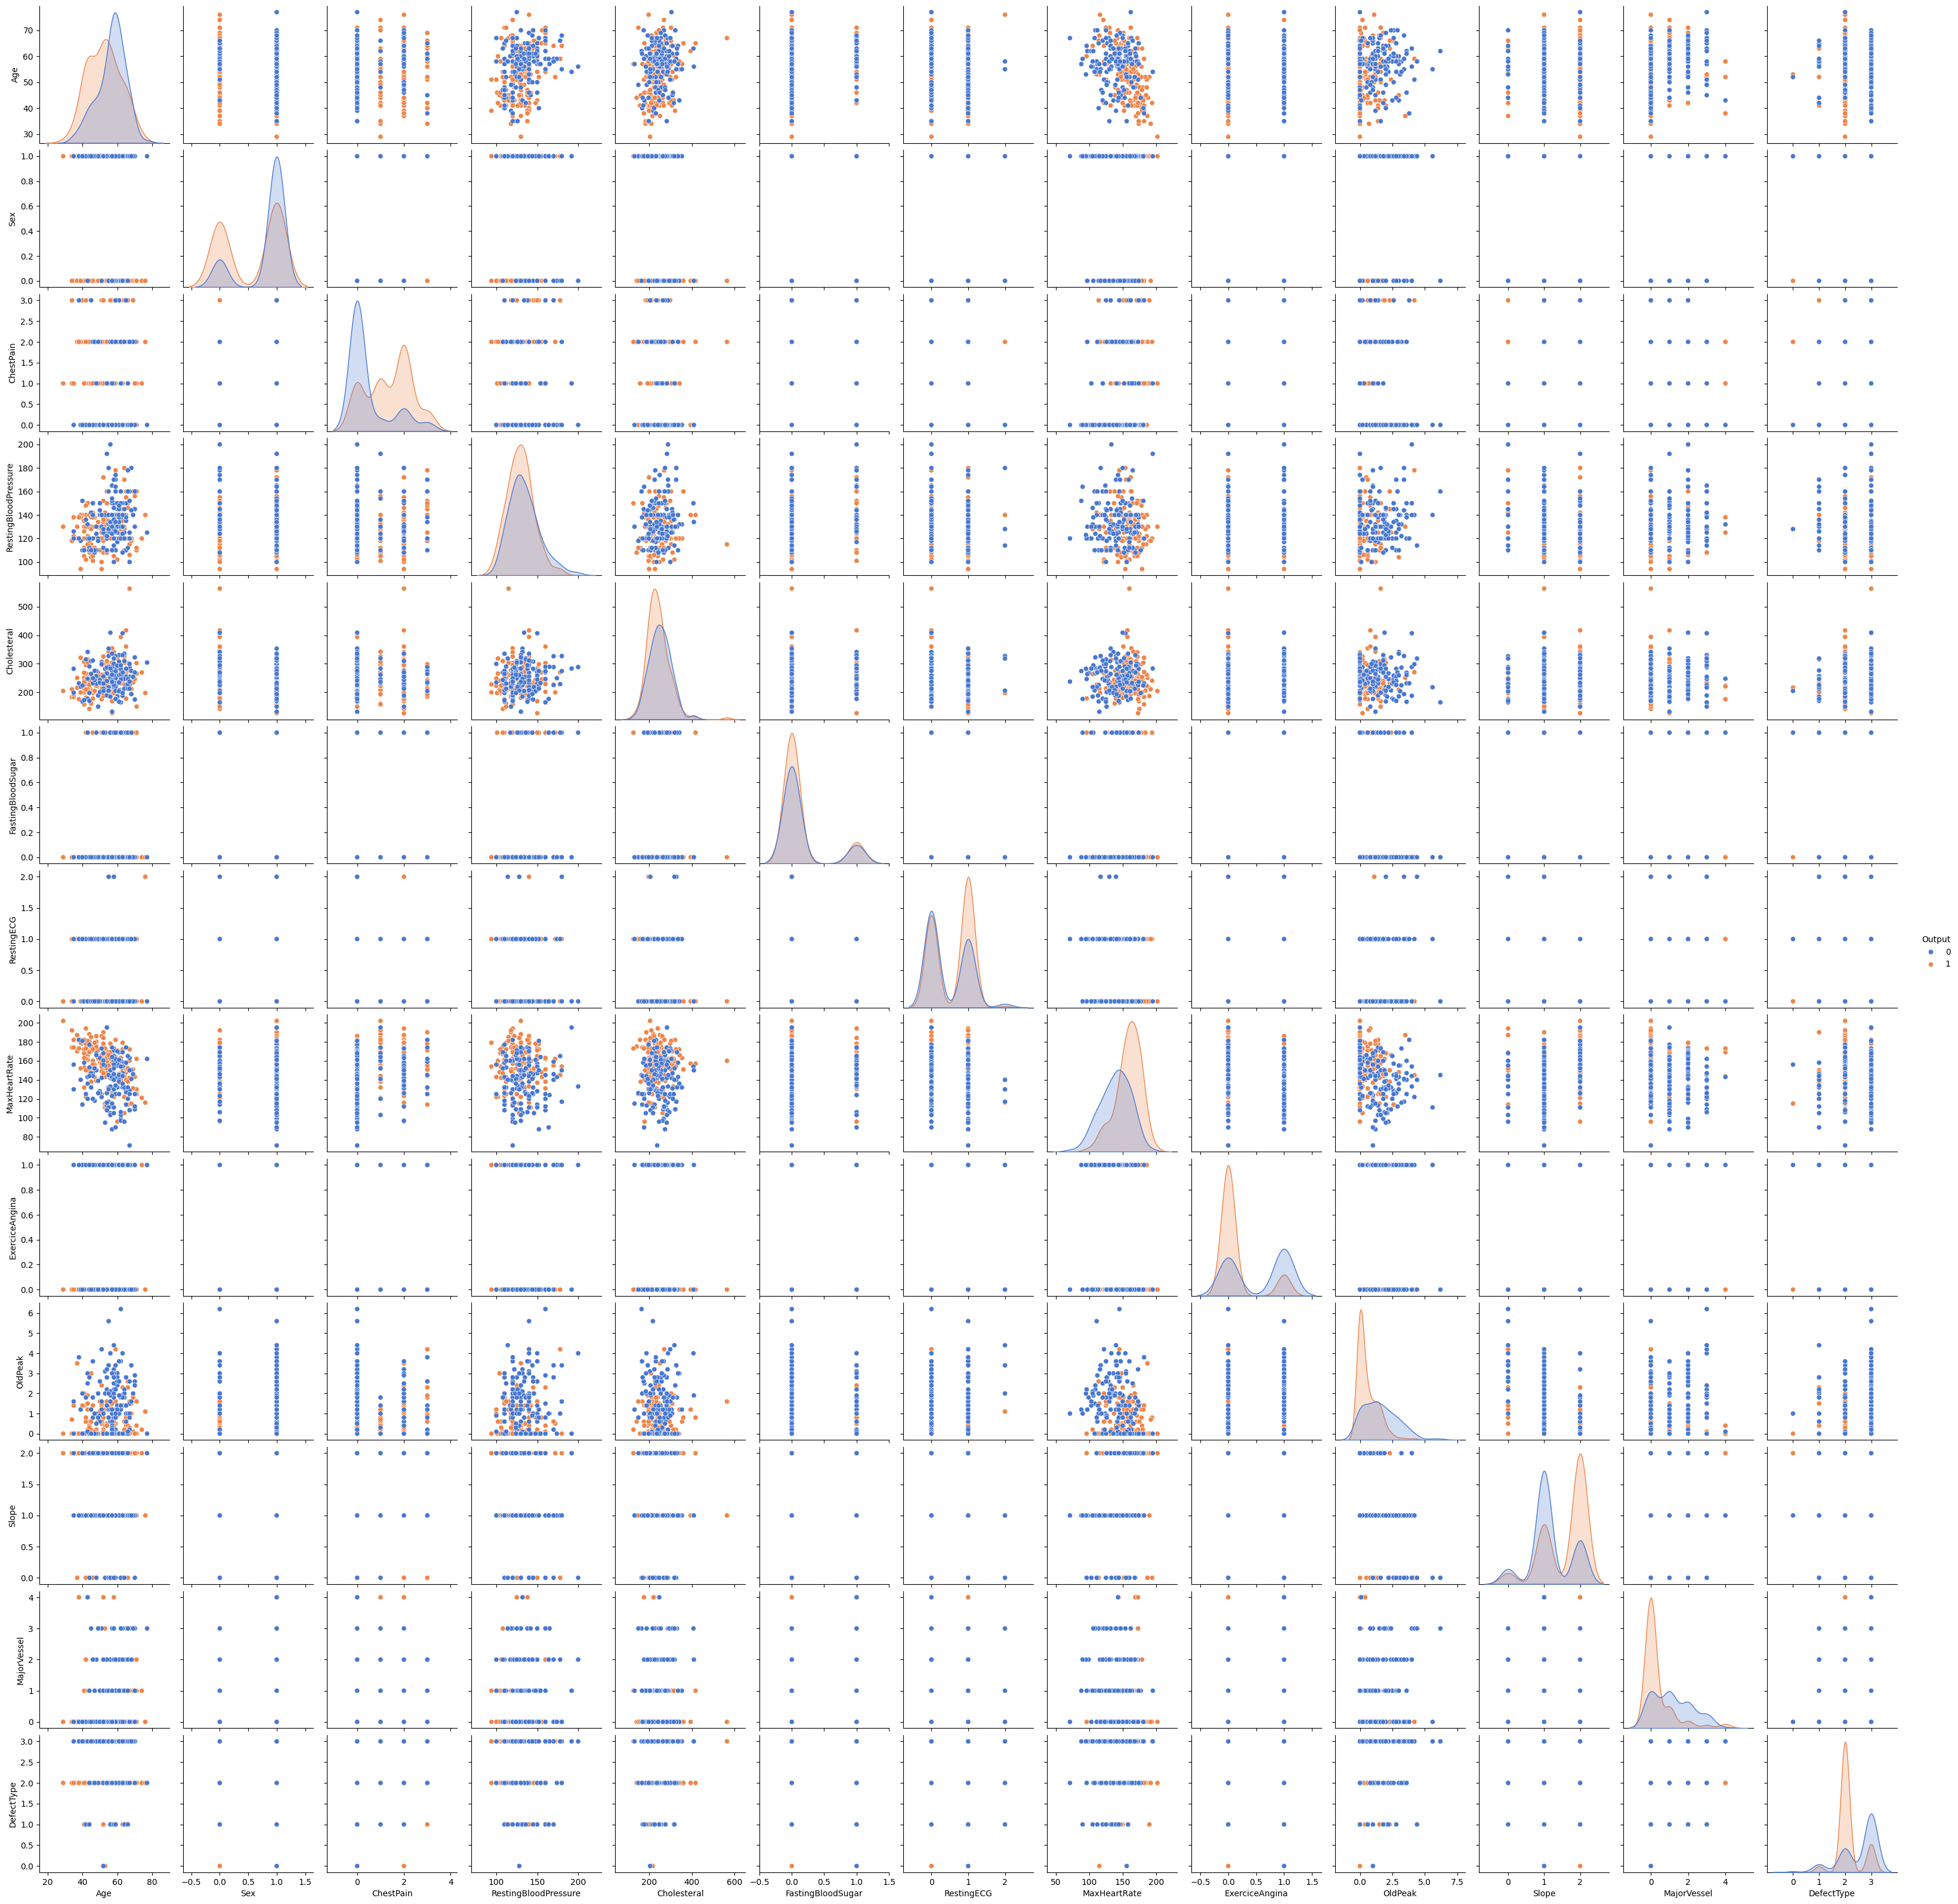

In [17]:
sns.pairplot(data, hue='Output', palette='muted')